In [1]:
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations
import seaborn as sns             # Data visualization
import matplotlib.pyplot as plt   # Plotting graphs

from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics

import re                        # Regular expressions (text processing)
import string                    # String operations

In [2]:
data_fake= pd.read_csv("Fake.csv")
data_true= pd.read_csv("True.csv")

In [3]:
data_fake.head()  # To display the first 5 rows of data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
data_fake["class"] = 0 #Adds a new column named class to the data_fake All values in this column are 0 representing fake news.
data_true["class"] = 1 #Adds a new column named class to the data_true All values in this column are 1 representing True news.
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [7]:
data_fake_testing = data_fake.tail(10) #Takes the last 10 rows of data_fake and puts them into a new variable 
for i in range(23480, 23470, -1): # Deletes the rows we took (23480 through 23471).
    data_fake.drop([i], axis=0, inplace=True) # Means the modification is done directly on the data_fake without creating a new copy.

In [8]:
data_true_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)

In [15]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [17]:
data_fake_testing['class'] = 0
data_true_testing['class'] = 1

C:\Users\moham\AppData\Local\Temp\ipykernel_14236\1780606541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_testing['class'] = 0
C:\Users\moham\AppData\Local\Temp\ipykernel_14236\1780606541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_testing['class'] = 1


In [19]:
data_fake_testing.head(10) #Check what it looks like after adding the column class

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [21]:
data_true_testing.head(10) 

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [23]:
data_merge = pd.concat([data_fake, data_true], axis=0) # Merges rows
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [25]:
data_merge.shape

(44878, 5)

In [27]:
data_merge.columns 

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [29]:
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

In [31]:
data.isnull().sum() # See where the empty cells are

text     0
class    0
dtype: int64

In [33]:
data = data.sample(frac=1)
data.head()

,text,class
22111,21st Century WireUS President Donald Trump has...,0
21730,MSNBC the cable news station who hired tax ...,0
7196,WASHINGTON (Reuters) - Two California housing ...,1
13127,Based on the number of supporters Trump is dra...,0
22251,This week President Donald Trump followed thr...,0


In [35]:
data.reset_index(inplace=True) #Renumbers rows from 0, 1, 2... after we merged them.
data.columns

Index(['index', 'text', 'class'], dtype='object')

In [37]:
data.drop(['index'], axis=1, inplace=True) # Found a coloumn we don't need so we removed it
data.columns

Index(['text', 'class'], dtype='object')

In [39]:
data.head()

,text,class
0,21st Century WireUS President Donald Trump has...,0
1,MSNBC the cable news station who hired tax ...,0
2,WASHINGTON (Reuters) - Two California housing ...,1
3,Based on the number of supporters Trump is dra...,0
4,This week President Donald Trump followed thr...,0


In [41]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [43]:
data['text'] = data['text'].apply(wordopt)

In [44]:
x = data['text']
y = data['class']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer #Turns sentences into numbers that the model understands.

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [48]:
pred_lr = LR.predict(xv_test)

In [49]:
LR.score(xv_test, y_test)

0.9882352941176471

In [50]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.98      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [51]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [52]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9964349376114082

In [53]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5868
           1       1.00      1.00      1.00      5352

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [56]:
pred_gb = GB.predict(xv_test)
GB.score(xv_test, y_test)

0.9940285204991087

In [57]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5868
           1       0.99      1.00      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [60]:
pred_rf = RF.predict(xv_test)

In [61]:
RF.score(xv_test, y_test)

0.9905525846702318

In [62]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.99      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [63]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"

In [64]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    
 
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    
  
    new_xv_test = vectorization.transform(new_x_test)

  
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)

 
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_RF[0]),
        output_label(pred_GB[0])
    ))


In [65]:
news = input(" write the news ")
manual_testing(news)

 write the news  viyfhjb




LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction: Fake News 
RF Prediction: Fake News


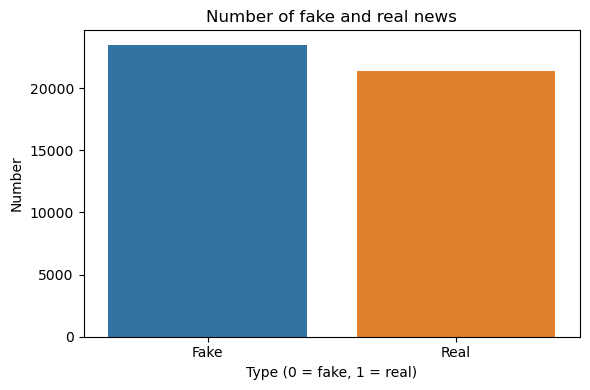

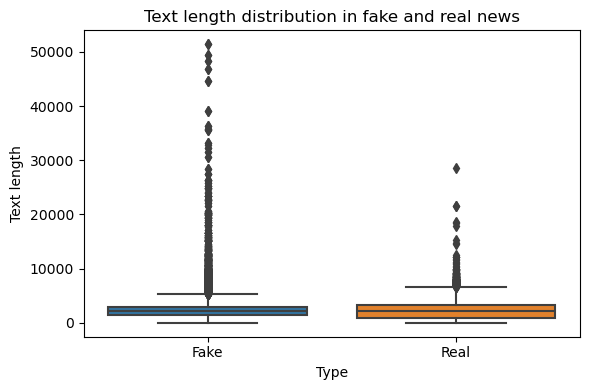

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class')
plt.title("Number of fake and real news")
plt.xlabel("Type (0 = fake, 1 = real)")
plt.ylabel("Number")
plt.xticks([0, 1], ["Fake", "Real"])
plt.tight_layout()
plt.show()

data["text_length"] = data["text"].apply(len)

plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='class', y='text_length')
plt.title("Text length distribution in fake and real news")
plt.xlabel("Type")
plt.ylabel("Text length")
plt.xticks([0, 1], ["Fake", "Real"])
plt.tight_layout()
plt.show()

In [68]:
import tkinter as tk
from tkinter import messagebox
def check_news():
    user_input = entry.get("1.0", tk.END).strip()
    if not user_input:
        messagebox.showwarning("⚠️ تنبيه", "الرجاء إدخال نص الخبر أولًا.")
        return

    cleaned = wordopt(user_input)
    vec_input = vectorization.transform([cleaned])
    prediction = LR.predict(vec_input)

    if prediction[0] == 1:
        result_label.config(text="✅ الخبر حقيقي", fg="#198754")
    else:
        result_label.config(text="❌ الخبر مزيف", fg="#dc3545")

# مسح الحقل
def clear_text():
    entry.delete("1.0", tk.END)
    result_label.config(text="")

# إعداد الواجهة
root = tk.Tk()
root.title("🧠 نظام التحقق من الأخبار")
root.geometry("750x550")
root.configure(bg="#eef1f5")

# ألوان
main_bg = "#eef1f5"
container_bg = "#ffffff"
btn_blue = "#0d6efd"
btn_dark = "#6c757d"
font_main = ("Segoe UI", 13)
font_title = ("Segoe UI", 20, "bold")
font_btn = ("Segoe UI", 12, "bold")

# عنوان التطبيق
title = tk.Label(root, text="📰 نظام ذكي لاكتشاف الأخبار المزيفة", font=font_title, bg=main_bg, fg="#0d6efd")
title.pack(pady=20)

# إطار الإدخال
entry_frame = tk.Frame(root, bg=container_bg, bd=1, relief=tk.SOLID)
entry_frame.pack(padx=30, pady=10, fill="both", expand=True)

entry = tk.Text(entry_frame, font=font_main, height=10, wrap=tk.WORD, bd=0, bg="#fbfbfb")
entry.pack(padx=10, pady=10, fill="both", expand=True)

# أزرار
button_frame = tk.Frame(root, bg=main_bg)
button_frame.pack(pady=15)

check_btn = tk.Button(button_frame, text="🔍 تحقق", font=font_btn, bg=btn_blue, fg="white",
                      activebackground="#0b5ed7", padx=25, pady=8, command=check_news, borderwidth=0)
check_btn.grid(row=0, column=0, padx=10)

clear_btn = tk.Button(button_frame, text="🧹 مسح", font=font_btn, bg=btn_dark, fg="white",
                      activebackground="#5a6268", padx=25, pady=8, command=clear_text, borderwidth=0)
clear_btn.grid(row=0, column=1, padx=10)

# نتيجة التحقق
result_label = tk.Label(root, text="", font=("Segoe UI", 16, "bold"), bg=main_bg)
result_label.pack(pady=20)

# تشغيل الواجهة
root.mainloop()